### Imports

In [1]:
from ActiveTestingRegressionMV import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

### Energy Efficiency Dataset from UCI Machine Learning Repository

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

X = df.iloc[:,:7].to_numpy()

y = df['Y1'].to_numpy()

X = StandardScaler().fit_transform(X)

# D_train and D_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=15) # 11

# train 
reg_learner = Pipeline([
            ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
            ("std", StandardScaler()),
            ("linear_regression", Ridge())])


reg_learner.fit(X_train, y_train)

y_pred = reg_learner.predict(X_test)

full_loss = np.sqrt(quadratic_loss(y_test, y_pred).mean())

print(full_loss, X_test.shape)

2.407898847157457 (384, 7)


### Regression NN (No Dropout)

Trial 30 Complete [00h 00m 03s]
mean_squared_error: 6.114569187164307

Best mean_squared_error So Far: 5.883739471435547
Total elapsed time: 00h 01m 11s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               2048      
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 288)               18720     
                                                                 
 dense_12 (Dense)            (None, 64)                18496     
                                                                 
 dense_13 (Dense)            (None, 480)               31200     
                                                                 
 dense_14 (Dense)            (Non

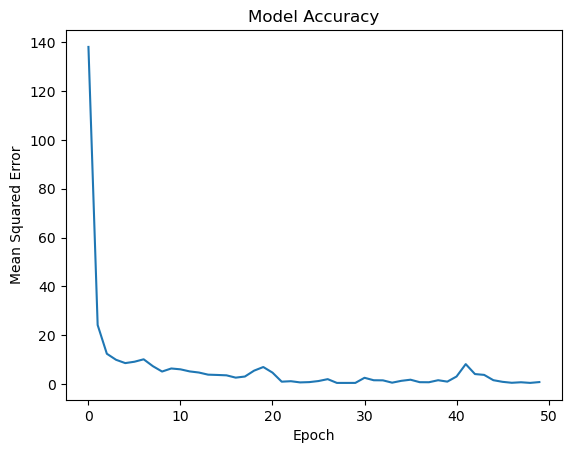

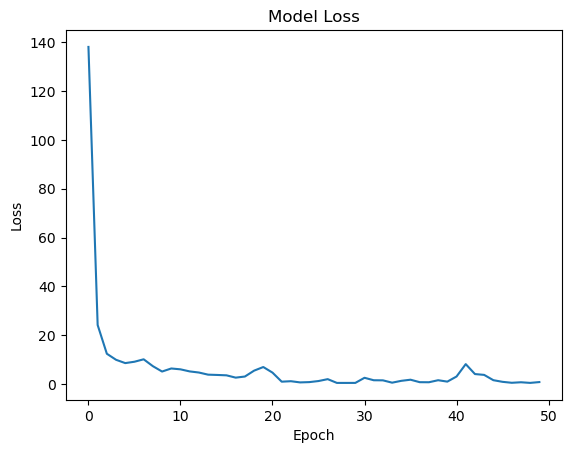

In [3]:
# Tune for data using gridsearch and create model
reg_evaluator = create_model(X_train, y_train, model_type = "boot", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Bootstrap Surrogate Sampling

---38---
12/12 [==============================] - 0s 1ms/step
---76---
12/12 [==============================] - 0s 2ms/step
---115---
12/12 [==============================] - 0s 1ms/step
---153---
12/12 [==============================] - 0s 2ms/step
---192---
12/12 [==============================] - 0s 1ms/step


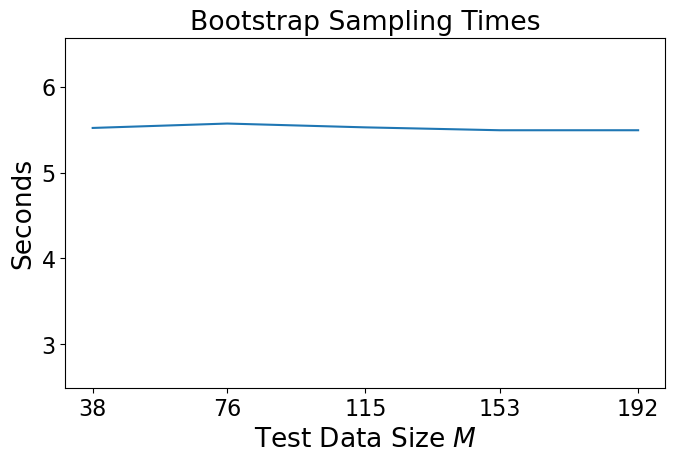

In [5]:
num_exp = 1 
n_reps = 30 
model_type="boot"
N = len(X_test)    
M_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5]) * N
M_values = M_values.astype(int)
result_mod_weighted = np.zeros((num_exp, len(M_values))) # nonuniform, weighted (unbiased)
timemat1 = []

for i in range(len(M_values)): 
    start = time.time()   
    M = M_values[i]
    print('---' + str(M) + '---')
    
    for exp in range(num_exp):
        # nonuniform, weighted
        observed_idx, weights = surrogate_sampling_model(X_train, y_train,
                                        X_test, y_pred, M, reg_evaluator, n_reps = n_reps, loss=quadratic_loss, model_type=model_type)

        result_mod_weighted[exp, i] = np.sqrt(risk_estimator_partial(y_test[observed_idx], y_pred[observed_idx], N,  
                    weights, quadratic_loss, mode='weighted'))
    end = time.time()    
    timemat1 = np.append(timemat1, end - start)

### Dropout Regression Model

Trial 30 Complete [00h 00m 02s]
mean_squared_error: 70.42871856689453

Best mean_squared_error So Far: 32.61379623413086
Total elapsed time: 00h 01m 14s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2048      
                                                                 
 lambda_5 (Lambda)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 448)               115136    
                                                                 
 lambda_6 (Lambda)           (None, 448)               0         
                                                                 
 dense_8 (Dense)             (None, 352)               158048    
                                                                 
 lambda_7 (Lambda)           (Non

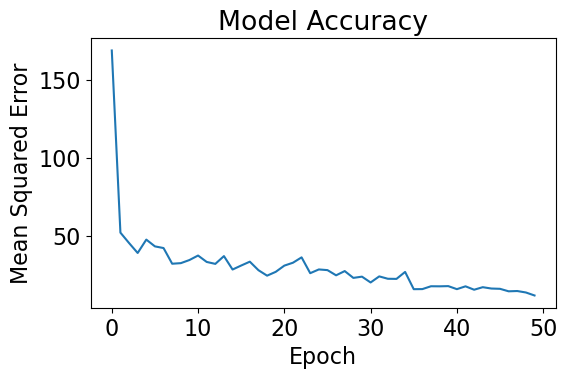

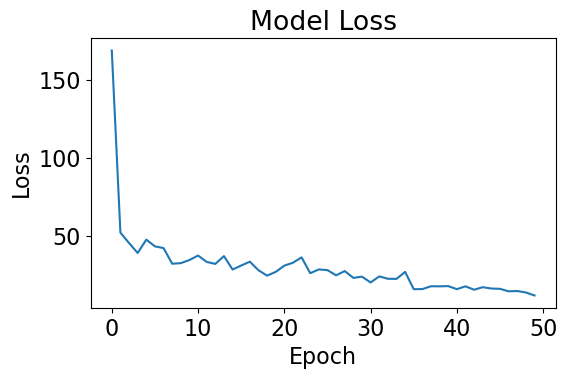

In [6]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "drop", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Dropout Surrogate Sampling

---38---
12/12 [==============================] - 0s 2ms/step
---76---
12/12 [==============================] - 0s 3ms/step
---115---
12/12 [==============================] - 0s 2ms/step
---153---
12/12 [==============================] - 0s 3ms/step
---192---
12/12 [==============================] - 0s 3ms/step


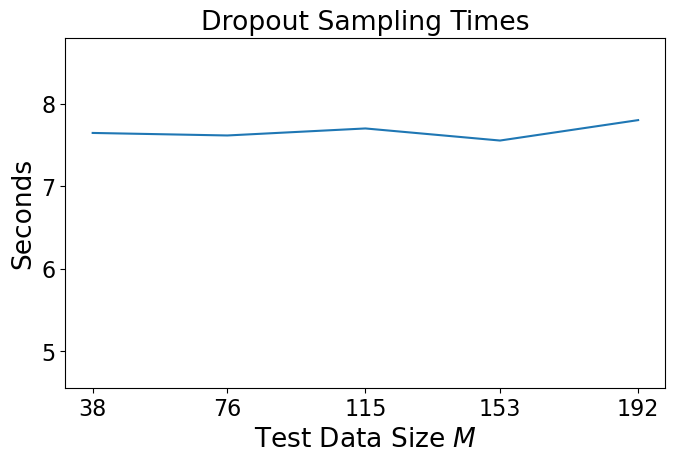

### Probabilistic Layer Regression Model

Trial 30 Complete [00h 00m 03s]
mean_squared_error: 8.11805248260498

Best mean_squared_error So Far: 6.424773693084717
Total elapsed time: 00h 01m 23s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               2048      
                                                                 
 dense_10 (Dense)            (None, 352)               90464     
                                                                 
 dense_11 (Dense)            (None, 480)               169440    
                                                                 
 dense_12 (Dense)            (None, 512)               246272    
                                                                 
 dense_13 (Dense)            (None, 352)               180576    
                                                                 
 dense_14 (Dense)            (None

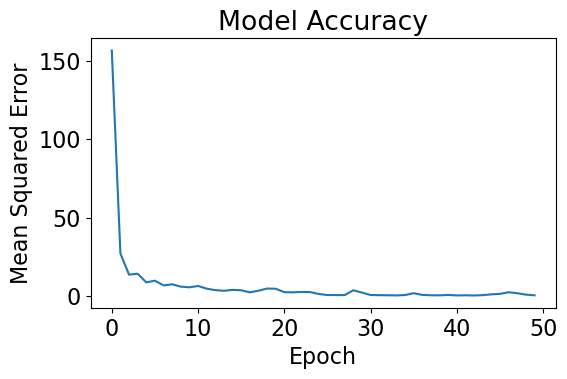

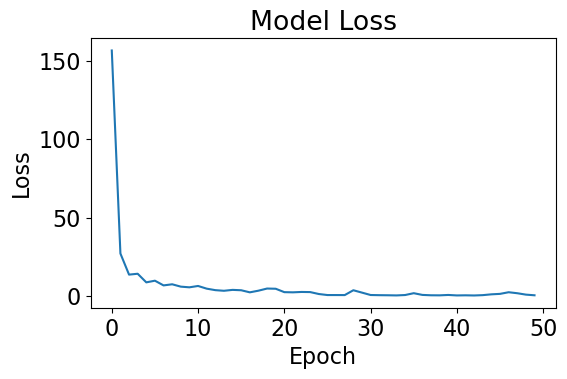

In [9]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "prob", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Probabilistic Layer Surrogate Sampling

---38---
12/12 [==============================] - 0s 1ms/step
---76---
12/12 [==============================] - 0s 2ms/step
---115---
12/12 [==============================] - 0s 2ms/step
---153---
12/12 [==============================] - 0s 2ms/step
---192---
12/12 [==============================] - 0s 2ms/step


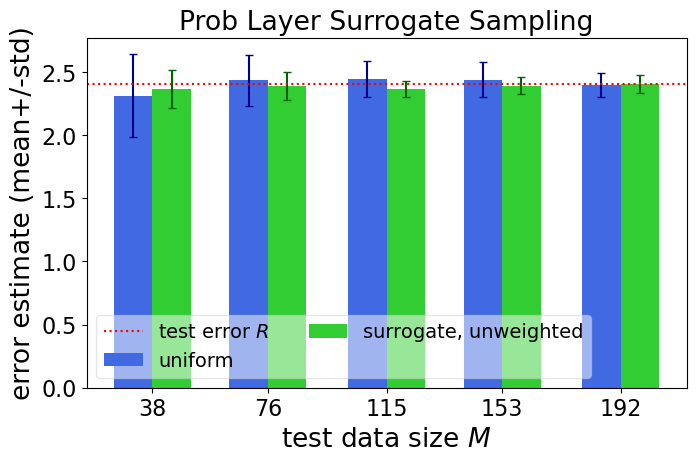

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
38,2.311936,0.327050,2.367924,0.151213
76,2.432929,0.199237,2.390454,0.112511
115,2.443761,0.142215,2.366525,0.062169
153,2.438587,0.139960,2.390818,0.065872
192,2.398864,0.095952,2.405408,0.072325


Full Test R Value: 2.407898847157457


In [10]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type = "prob", num_exp = 30, plot_title = "Prob Layer")

---38---
12/12 [==============================] - 0s 2ms/step
---76---
12/12 [==============================] - 0s 2ms/step
---115---
12/12 [==============================] - 0s 2ms/step
---153---
12/12 [==============================] - 0s 2ms/step
---192---
12/12 [==============================] - 0s 2ms/step


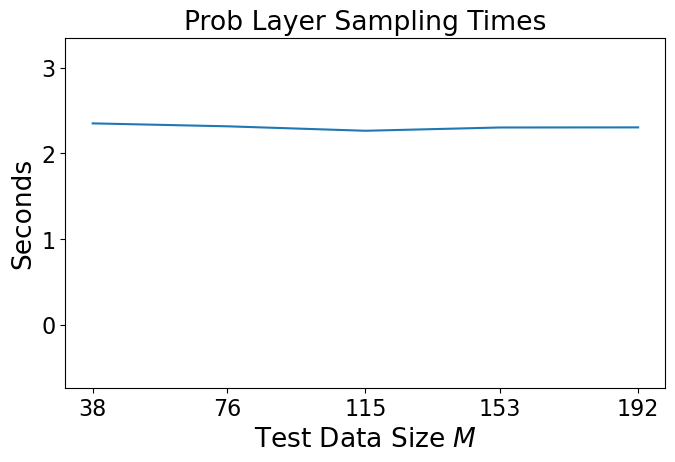

In [11]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "prob", plot_title = "Prob Layer")

### Variational Inference Regression Model

In [12]:
reg_evaluator = build_vi(X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational (DenseVa  (32, 2)                   48        
 riational)                                                      
                                                                 
 dense_variational_1 (Dense  (32, 2)                   18        
 Variational)                                                    
                                                                 
 distribution_lambda (Distr  ((32, 1),                 0         
 ibutionLambda)               (32, 1))                           
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---38---
12/12 [==============================] - 0s 0s/step
---76---
12/12 [==============================] - 0s 727us/step
---115---
12/12 [==============================] - 0s 2ms/step
---153---
12/12 [==============================] - 0s 2ms/step
---192---
12/12 [==============================] - 0s 0s/step


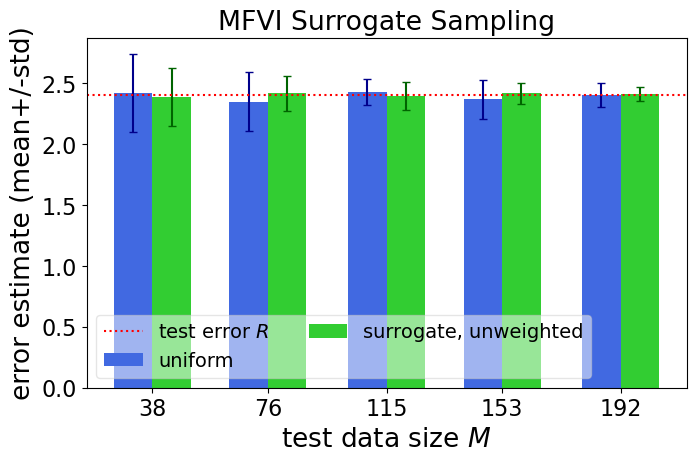

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
38,2.419354,0.318227,2.386874,0.235930
76,2.349675,0.239844,2.417259,0.145277
115,2.429552,0.108903,2.395866,0.117566
153,2.367613,0.157359,2.416745,0.083456
192,2.401430,0.099991,2.413019,0.054755


Full Test R Value: 2.407898847157457


In [13]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type ="vi", num_exp = 30, plot_title = "MFVI")

---38---
12/12 [==============================] - 0s 2ms/step
---76---
12/12 [==============================] - 0s 54us/step
---115---
12/12 [==============================] - 0s 1ms/step
---153---
12/12 [==============================] - 0s 1ms/step
---192---
12/12 [==============================] - 0s 2ms/step


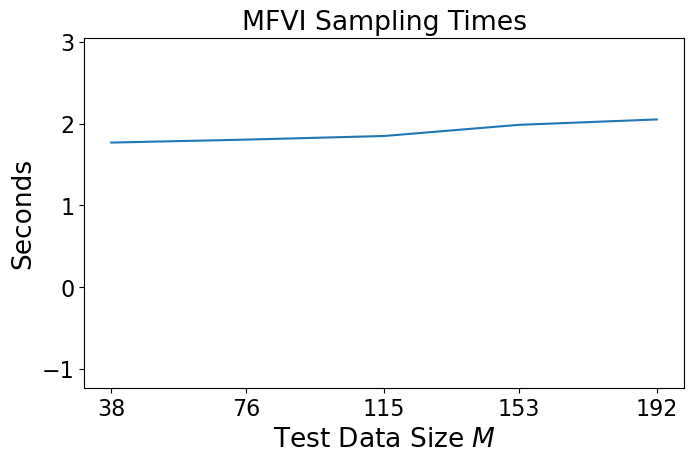

In [14]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "vi", plot_title = "MFVI")

In [ ]:
plt.rcParams.update({'font.size': 16, "figure.figsize": (6,3.5)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in range(4)
    plt.plot(M_values,timemat{i+1})
ax.set_xticks(M_values)
ax.set_ylabel('Seconds', fontsize=19)
ax.set_xlabel('Test Data Size $M$', fontsize=19)
plt.show()